In [31]:
!pip install jdatetime

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jdatetime
import seaborn as sns
import re

In [15]:
df = pd.read_csv('/content/Blue - transaction - 14030519210136.xlsx - transaction.csv (2).csv')

In [16]:
df

,Total,Withdrawal,Deposit,Trasaction_Type,Doc_Exp,Doc_Num,Date,Index
0,"851,603",0,"3,586",واریز سود بانکی,واریز سود علی الحساب به :611828005230310401 از...,1.402492e+12,1402/06/04 1:11:13,1.0
1,"855,204",0,"3,601",واریز سود بانکی,واریز سود علی الحساب به :611828005230310401 از...,1.402619e+12,1402/07/04 1:20:27,2.0
2,"858,704",0,"3,500",واریز سود بانکی,واریز سود علی الحساب به :611828005230310401 از...,1.402756e+12,1402/08/04 0:42:15,3.0
3,"862,219",0,"3,515",واریز سود بانکی,واریز سود علی الحساب به :611828005230310401 از...,1.402901e+12,1402/09/04 0:47:17,4.0
4,"162,219","700,000",0,انتقال به کارت,انتقال به کارت شماره: 6273811154122474 بنام: ر...,1.402917e+12,1402/09/07 6:39:59,5.0
...,...,...,...,...,...,...,...,...
101,"261,631","180,000",0,انتقال به سپرده,انتقال به سپرده بلو - شماره سپرده: 61182800567...,1.403102e+13,1403/05/12 19:06:18,102.0
102,"61,631","200,000",0,انتقال به کارت,انتقال به کارت شماره: 6273811154122474 بنام: ر...,1.403103e+13,1403/05/13 5:25:06,103.0
103,"54,431","7,200",0,کارمزد,برداشت از سپرده بابت کارمزد انتقال کارت به کار...,1.403103e+13,1403/05/13 5:25:06,104.0
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print(df.columns)

Index(['Total', 'Withdrawal', 'Deposit', 'Trasaction_Type', 'Doc_Exp',
       'Doc_Num', 'Date', 'Index'],
      dtype='object')


In [21]:
print(df['Trasaction_Type'].isnull().sum())

2


In [23]:
df = df.dropna(subset = ['Trasaction_Type'])

In [26]:
transaction_count = df['Trasaction_Type'].value_counts()
print(transaction_count)

Trasaction_Type
دریافت از کارت       23
کارمزد               22
انتقال به کارت       21
خرید اینترنتی        15
واریز سود بانکی       7
انتقال به سپرده       5
دریافت از سپرده       3
قبض                   3
دریافت پایا           2
انتقال پایا           1
کارمزد سفارش کارت     1
سایر                  1
Name: count, dtype: int64


In [35]:
def convert_date(jalali_date):
  year, month, day, hour, minute, second = map(int, jalali_date.split()[0].split('/') + jalali_date.split()[1].split(':'))
  gregorian_date = jdatetime.datetime(year, month, day, hour, minute, second, locale='fa_IR').togregorian()
  return gregorian_date

In [36]:
df['Gregorian_Date'] = df['Date'].apply(convert_date)
df['Gregorian_Date'] = pd.to_datetime(df['Gregorian_Date'])

<ipython-input-36-9e36624a8cc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gregorian_Date'] = df['Date'].apply(convert_date)
<ipython-input-36-9e36624a8cc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gregorian_Date'] = pd.to_datetime(df['Gregorian_Date'])


In [37]:
def convert_and_extract_day(jalali_date):
    year, month, day = map(int, jalali_date.split()[0].split('/'))
    gregorian_date = jdatetime.date(year, month, day).togregorian()
    return gregorian_date.day

In [38]:
df['Day'] = df['Date'].apply(convert_and_extract_day)

<ipython-input-38-416686b88209>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].apply(convert_and_extract_day)


In [39]:
df['Deposit'] = df['Deposit'].str.replace(',', '').astype(float)

<ipython-input-39-9a57f66c5eb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Deposit'] = df['Deposit'].str.replace(',', '').astype(float)


In [40]:
pivot_table = df.pivot_table(values='Deposit', index='Day', aggfunc='sum')

In [41]:
pivot_table = pivot_table.fillna(0)

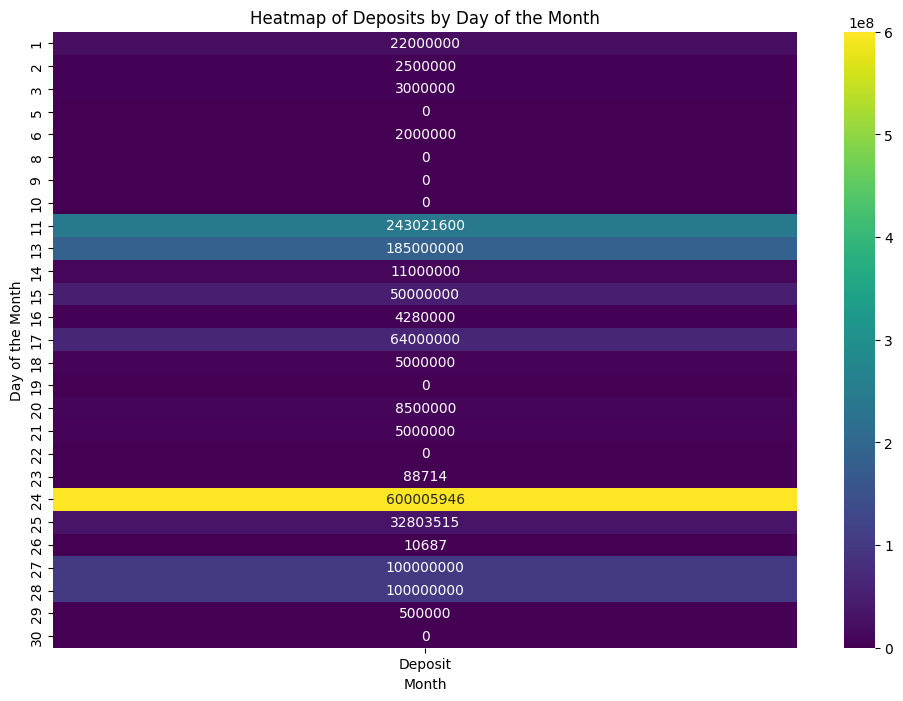

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".0f")
plt.title('Heatmap of Deposits by Day of the Month')
plt.xlabel('Month')
plt.ylabel('Day of the Month')
plt.show()

In [47]:
date_pattern = r'از تاریخ: (\d{4}-\d{2}-\d{2}) تا تاریخ : (\d{4}-\d{2}-\d{2})'
account_number_pattern = r'شماره کارت: (\d+)'
document_number_pattern = r'شماره سند: (\d+)'
name_pattern = r'بنام: ([\w\s]+)'
transaction_number_pattern = r'ش م: (\d+)'
tracking_number_pattern = r'ش پ: (\d+)'

In [50]:
def extract_info(row):
    dates = re.findall(date_pattern, row)
    account_number = re.search(account_number_pattern, row)
    document_number = re.search(document_number_pattern, row)
    name = re.search(name_pattern, row)
    transaction_number = re.search(transaction_number_pattern, row)
    tracking_number = re.search(tracking_number_pattern, row)

    return pd.Series({
        'Start_Date': dates[0][0] if dates else None,
        'End_Date': dates[0][1] if dates else None,
        'Account_Number': account_number.group(1) if account_number else None,
        'Document_Number': document_number.group(1) if document_number else None,
        'Name': name.group(1) if name else None,
        'Transaction_Number': transaction_number.group(1) if transaction_number else None,
        'Tracking_Number': tracking_number.group(1) if tracking_number else None
    })

In [51]:
df[['Start_Date', 'End_Date', 'Account_Number', 'Document_Number', 'Name', 'Transaction_Number', 'Tracking_Number']] = df['Doc_Exp'].apply(extract_info)

<ipython-input-51-a015a9604b44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Start_Date', 'End_Date', 'Account_Number', 'Document_Number', 'Name', 'Transaction_Number', 'Tracking_Number']] = df['Doc_Exp'].apply(extract_info)
<ipython-input-51-a015a9604b44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Start_Date', 'End_Date', 'Account_Number', 'Document_Number', 'Name', 'Transaction_Number', 'Tracking_Number']] = df['Doc_Exp'].apply(extract_info)
<ipython-input-51-a015a9604b44>:1: SettingWi

In [52]:
print(df[['Start_Date', 'End_Date', 'Account_Number', 'Document_Number', 'Name', 'Transaction_Number', 'Tracking_Number']])

     Start_Date    End_Date Account_Number Document_Number  \
0    1402-05-04  1402-06-04           None   1402492283644   
1    1402-06-04  1402-07-04           None   1402618946931   
2    1402-07-04  1402-08-04           None   1402755867913   
3    1402-08-04  1402-09-04           None   1402900769064   
4          None        None           None            None   
..          ...         ...            ...             ...   
99         None        None           None            None   
100        None        None           None            None   
101        None        None           None  14031024007785   
102        None        None           None            None   
103        None        None           None            None   

                                                  Name Transaction_Number  \
0                                                 None               None   
1                                                 None               None   
2                       